In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Asus\Downloads\datasets_2778_6345_Mass Shootings Dataset Ver 2.csv",encoding="ISO-8859-1")

In [3]:
df.head()

,S#,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,NaN,58,527,585,Unclear,White,M,36.181271,-115.134132
1,2,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,Yes,Asian,M,NaN,NaN
2,3,Pennsylvania supermarket shooting,"Tunkhannock, PA",6/7/2017,"Randy Stair, a 24-year-old worker at Weis groc...",3,0,3,Unclear,White,M,NaN,NaN
3,4,Florida awning manufacturer shooting,"Orlando, Florida",6/5/2017,"John Robert Neumann, Jr., 45, a former employe...",5,0,5,Unclear,NaN,M,NaN,NaN
4,5,Rural Ohio nursing home shooting,"Kirkersville, Ohio",5/12/2017,"Thomas Hartless, 43, shot and killed a former ...",3,0,3,Yes,White,M,NaN,NaN


In [4]:
#This dataset is related to mass shooting which are happening in usa .We will first do data munging and then do exploratory data analysis.

In [5]:
df.shape
#The data consist of 320 columns and 13 rows

(320, 13)

In [6]:
df.columns
#The dataset consist of following columns

Index(['S#', 'Title', 'Location', 'Date', 'Summary', 'Fatalities', 'Injured',
       'Total victims', 'Mental Health Issues', 'Race', 'Gender', 'Latitude',
       'Longitude'],
      dtype='object')

In [7]:
df.dtypes

S#                        int64
Title                    object
Location                 object
Date                     object
Summary                  object
Fatalities                int64
Injured                   int64
Total victims             int64
Mental Health Issues     object
Race                     object
Gender                   object
Latitude                float64
Longitude               float64
dtype: object

In [8]:
#s# columns is of no use and also we find the data type of date column is not correct we have to change its datatype to datetype
df.drop('S#',inplace=True,axis=1)

In [9]:
df.head()

,Title,Location,Date,Summary,Fatalities,Injured,Total victims,Mental Health Issues,Race,Gender,Latitude,Longitude
0,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,NaN,58,527,585,Unclear,White,M,36.181271,-115.134132
1,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,Yes,Asian,M,NaN,NaN
2,Pennsylvania supermarket shooting,"Tunkhannock, PA",6/7/2017,"Randy Stair, a 24-year-old worker at Weis groc...",3,0,3,Unclear,White,M,NaN,NaN
3,Florida awning manufacturer shooting,"Orlando, Florida",6/5/2017,"John Robert Neumann, Jr., 45, a former employe...",5,0,5,Unclear,NaN,M,NaN,NaN
4,Rural Ohio nursing home shooting,"Kirkersville, Ohio",5/12/2017,"Thomas Hartless, 43, shot and killed a former ...",3,0,3,Yes,White,M,NaN,NaN


In [10]:
df['Date']=pd.to_datetime(df['Date'])
df['Date'].dtypes


dtype('<M8[ns]')

In [11]:
#let us find the null values in dataset
df.isnull().sum()



Title                    0
Location                45
Date                     0
Summary                  1
Fatalities               0
Injured                  0
Total victims            0
Mental Health Issues     0
Race                     2
Gender                   0
Latitude                17
Longitude               17
dtype: int64

In [12]:
df.describe()

,Fatalities,Injured,Total victims,Latitude,Longitude
count,320.000000,320.0000,320.000000,303.000000,303.000000
mean,4.375000,6.1625,10.187500,37.225076,-94.429539
std,5.652142,30.0169,33.757607,5.536365,16.513296
min,0.000000,0.0000,3.000000,21.325512,-161.792752
25%,1.000000,1.0000,4.000000,33.571459,-110.205485
50%,3.000000,3.0000,5.000000,36.443290,-88.122998
75%,5.250000,5.0000,9.000000,41.483844,-81.703237
max,58.000000,527.0000,585.000000,60.790539,-69.707823


# EXPLOARTORY DATA ANALYSIS

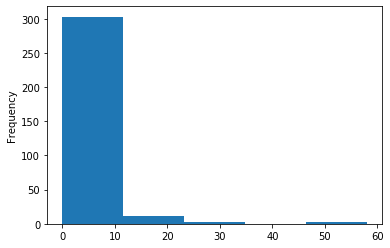

In [13]:
df['Fatalities'].plot(kind='hist',bins=5)
#This plot shows most of the death in various location ranging in between 0-10

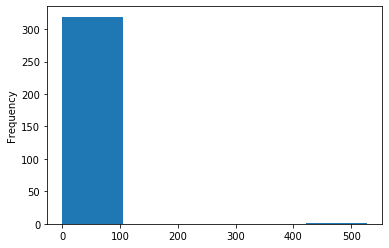

In [14]:
df['Injured'].plot(kind='hist',bins=5)

In [15]:
df['Year']=df.Date.dt.year

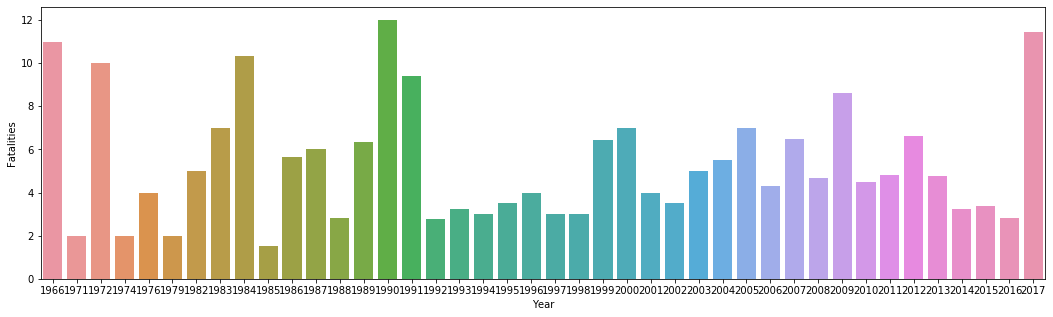

In [42]:
plt.rcParams["figure.figsize"]=(18,5)
sns.barplot(x=df['Year'],y=df['Fatalities'],ci=None)
#This plot shows maximum fatalities weren happen in year 1990

In [21]:
import datetime as dt
df['Weekday']=df['Date'].apply(lambda x:dt.datetime.strftime(x, '%A'))

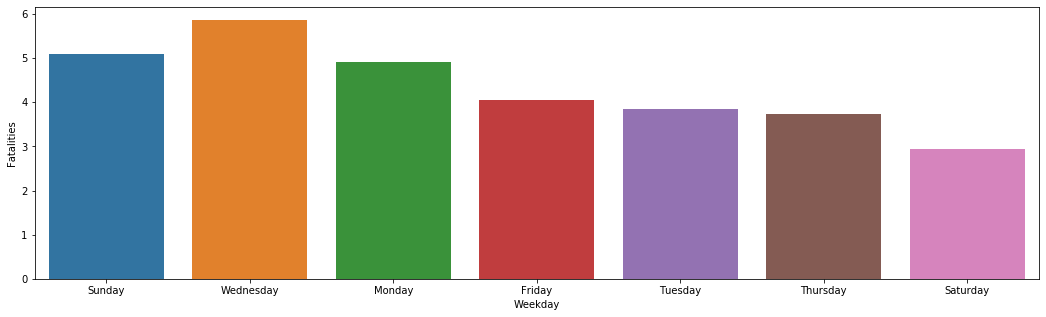

In [22]:
sns.barplot(x=df['Weekday'],y=df['Fatalities'],ci=None)

In [23]:
df['Race'].value_counts()

White American or European American                    122
Black American or African American                      76
Unknown                                                 42
Some other race                                         20
white                                                   12
Asian American                                          11
White                                                    7
Asian                                                    6
Latino                                                   5
Black                                                    4
Native American or Alaska Native                         3
black                                                    3
Two or more races                                        2
Other                                                    2
Black American or African American/Unknown               1
White American or European American/Some other Race      1
Asian American/Some other race                          

In [24]:
#we observe that we can combine many races and some of the races are repeted twice due to character difference like white and White
df.replace({'white':'White','black':'Black','Black American or African American':'Black American or African American/Unknown','White American or European American': 'White American or European American/Some other Race' ,'Asian American':'Asian American/Some other race'},inplace=True)

In [25]:
#we can combine some other race ,two or more race,unknown,other
df['Race']=df['Race'].apply(lambda x:'Other' if x=='Two or more races'or x=='Some other race' or else x)

SyntaxError: invalid syntax (<ipython-input-25-b9c8664da575>, line 2)

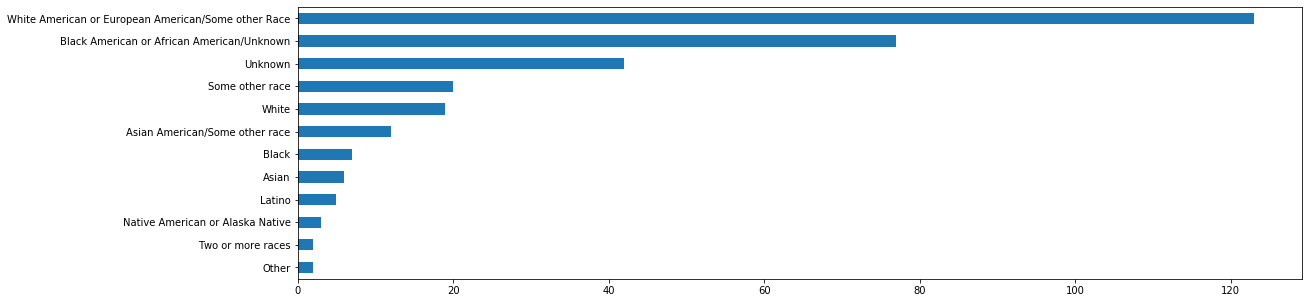

In [26]:
df['Race'].value_counts(ascending=True).plot(kind='barh')

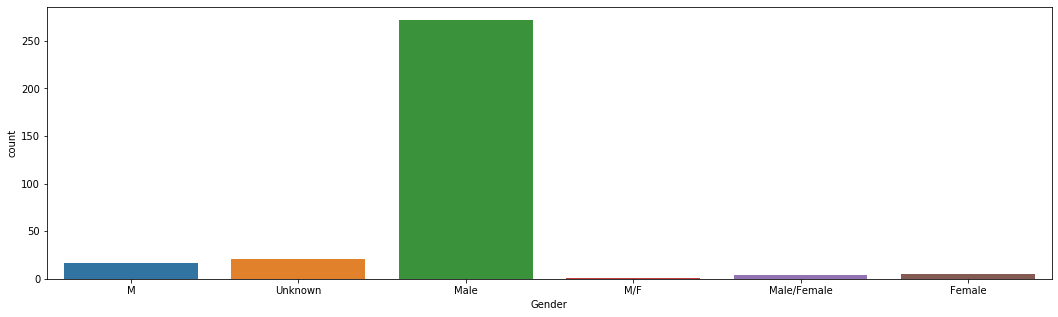

In [27]:
sns.countplot(df['Gender'])

In [29]:
df['Gender']=df['Gender'].apply(lambda x:'Male'if x=='M'else x)
df['Gender']=df['Gender'].apply(lambda x:'Unknown'if x=='Male/Female'or x=='M/F' else x)

In [33]:
df['Gender'].value_counts()

Male       289
Unknown     26
Female       5
Name: Gender, dtype: int64

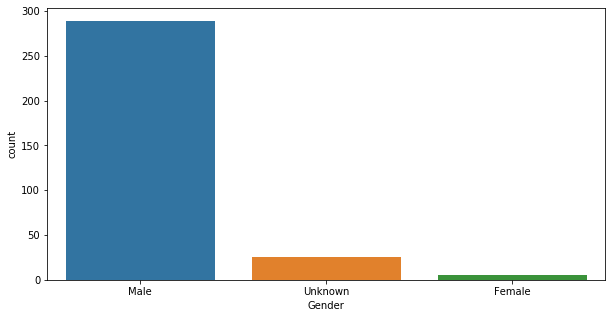

In [34]:
plt.rcParams["figure.figsize"]=(10,5)
sns.countplot(df['Gender'])

In [35]:
df['Mental Health Issues'].value_counts()

Unknown    110
Yes        106
No          90
Unclear     13
unknown      1
Name: Mental Health Issues, dtype: int64

In [38]:
df['Mental Health Issues']=df['Mental Health Issues'].apply(lambda x:'Unclear'if x=='Unknown'or x=='unknown'else x)

In [39]:
df['Mental Health Issues'].value_counts()

Unclear    124
Yes        106
No          90
Name: Mental Health Issues, dtype: int64

In [43]:
#Now let us find state wise total cases
df['State']=df['Location'].str.rpartition(',')[2]

In [44]:
df['State'].value_counts()

 California        29
 Florida           20
 Texas             16
 Washington        14
 Georgia           13
 North Carolina    11
 Arizona           11
 Ohio              10
 New York          10
 Alabama            9
 Illinois           9
 Wisconsin          9
 Pennsylvania       8
 Colorado           6
 Michigan           6
 South Carolina     5
 Nevada             5
 Kentucky           5
 Oklahoma           5
 Virginia           5
 Tennessee          5
 Louisiana          4
 Oregon             4
 Kansas             4
 Mississippi        4
 Massachusetts      4
 Minnesota          4
 Missouri           3
 Connecticut        3
 Nebraska           3
 New Jersey         3
 New Mexico         3
 Arkansas           2
 Montana            2
 CA                 2
 Utah               2
 Vermont            1
 NV                 1
 Wyoming            1
 WA                 1
 Alaska             1
 LA                 1
  Virginia          1
 South Dakota       1
 Maine              1
 Iowa     

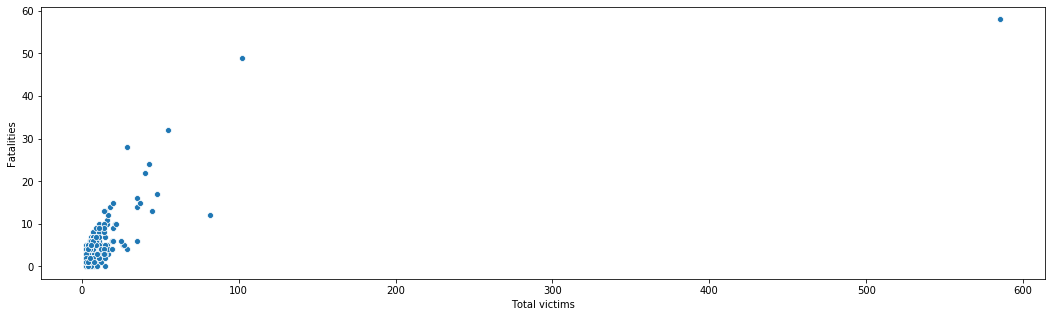

In [45]:
sns.scatterplot(x='Total victims',y='Fatalities',data=df)

In [65]:
df.loc[2,['Location']]=['Las Vegas, NV']

In [66]:
df.iloc[2]

Title                                   Pennsylvania supermarket shooting
Location                                                    Las Vegas, NV
Date                                                  2017-06-07 00:00:00
Summary                 Randy Stair, a 24-year-old worker at Weis groc...
Fatalities                                                              3
Injured                                                                 0
Total victims                                                           3
Mental Health Issues                                              Unclear
Race                                                                White
Gender                                                               Male
Latitude                                                              NaN
Longitude                                                             NaN
Year                                                                 2017
Weekday                               

In [74]:
np.max(df['Fatalities'].values)

58